In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
## Final Flights data
df = pd.read_csv('transformed data 700 600 150/flights_final_with_estimates.csv', sep="\t", quoting=csv.QUOTE_ALL)

In [3]:
df.columns

Index(['index', 'Date (MM/DD/YYYY)', 'File', 'Gtype', 'Flight Time',
       'Start Time', 'End Time', 'Landing', 'Start_Alt (ft MSL)',
       'Max Altitude (ft MSL/ft AGL)', 'Surface Height (ft MSL)',
       'Pressure Altitude (ft MSL)', 'Offset (ft)', 'Sensor Info',
       'ENL_Engine_Run_Start_Times', 'MOP_Engine_Run_Start_Times',
       'RPM_Engine_Run_Start_Times', 'ENL_Engine_Run_Altitudes_MSL',
       'MOP_Engine_Run_Altitudes_MSL', 'RPM_Engine_Run_Altitudes_MSL',
       'ENL_Engine_Run_Altitudes_AGL', 'MOP_Engine_Run_Altitudes_AGL',
       'RPM_Engine_Run_Altitudes_AGL', 'ENL_Noise_Registration_Times',
       'MOP_Noise_Registration_Times', 'RPM_Noise_Registration_Times',
       'ENL_Noise_Registration_Altitudes_AGL',
       'MOP_Noise_Registration_Altitudes_AGL',
       'RPM_Noise_Registration_Altitudes_AGL', 'first_event_time',
       'event_type', 'event_sensor', 'flight_start_datetime', 'window_start',
       'window_end', 'altitude rate of change during pre-event window(ft/

In [4]:
df['Start Time'] = pd.to_datetime(df['Start Time'].astype(str),format="%H%M%S").dt.time
df['Start Time']

0      16:44:59
1      19:37:03
2      18:38:35
3      19:31:32
4      17:07:46
         ...   
403    17:33:56
404    19:17:17
405    17:52:02
406    17:58:26
407    17:48:28
Name: Start Time, Length: 408, dtype: object

In [5]:
df['first_event_time'] = pd.to_datetime(df['first_event_time'].astype(str),format="%H%M%S").dt.time
df['first_event_time']

0      16:57:05
1      19:37:03
2      18:47:38
3      20:26:16
4      17:18:02
         ...   
403    19:48:39
404    19:17:17
405    21:15:25
406    20:27:32
407    21:11:40
Name: first_event_time, Length: 408, dtype: object

In [6]:
df['time_difference'] = df.apply(lambda row: 
    pd.to_datetime(str(row['first_event_time'])) - pd.to_datetime(str(row['Start Time'])), axis=1)

In [7]:
df['time_difference'] = df['time_difference'].astype(str).str.split('0 days ').str[-1]
df['time_difference'].head(10)

0    00:12:06
1    00:00:00
2    00:09:03
3    00:54:44
4    00:10:16
5    04:30:44
6    04:04:34
7    00:10:12
8    01:43:56
9    00:03:52
Name: time_difference, dtype: object

In [8]:
df['Less_than_5_min_into_flight'] = df['time_difference'].between('00:00:00','00:05:00')
df['Less_than_5_min_into_flight'].head(10)

0    False
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: Less_than_5_min_into_flight, dtype: bool

In [9]:
df.columns

Index(['index', 'Date (MM/DD/YYYY)', 'File', 'Gtype', 'Flight Time',
       'Start Time', 'End Time', 'Landing', 'Start_Alt (ft MSL)',
       'Max Altitude (ft MSL/ft AGL)', 'Surface Height (ft MSL)',
       'Pressure Altitude (ft MSL)', 'Offset (ft)', 'Sensor Info',
       'ENL_Engine_Run_Start_Times', 'MOP_Engine_Run_Start_Times',
       'RPM_Engine_Run_Start_Times', 'ENL_Engine_Run_Altitudes_MSL',
       'MOP_Engine_Run_Altitudes_MSL', 'RPM_Engine_Run_Altitudes_MSL',
       'ENL_Engine_Run_Altitudes_AGL', 'MOP_Engine_Run_Altitudes_AGL',
       'RPM_Engine_Run_Altitudes_AGL', 'ENL_Noise_Registration_Times',
       'MOP_Noise_Registration_Times', 'RPM_Noise_Registration_Times',
       'ENL_Noise_Registration_Altitudes_AGL',
       'MOP_Noise_Registration_Altitudes_AGL',
       'RPM_Noise_Registration_Altitudes_AGL', 'first_event_time',
       'event_type', 'event_sensor', 'flight_start_datetime', 'window_start',
       'window_end', 'altitude rate of change during pre-event window(ft/

In [10]:
df_filtered = df[df['Less_than_5_min_into_flight'] == True]

In [11]:
df_filtered.head(5)

,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),Max Altitude (ft MSL/ft AGL),...,Engine_Start_Above_1000ft,agl_all_events,first_event_datetime,num_engine_starts_below_1000ft_Alt,pct_engine_starts_below_1000ft_Alt,Est_Min_TAS_knots,Est_Max_TAS_knots,Est_Avg_TAS_knots,time_difference,Less_than_5_min_into_flight
1,15,06/27/2024,46RGJUM1.IGC,VENTUS 3F,3:42:29,19:37:03,231932,HOME,3713,11335[8058],...,False,13.0,2024-06-27 19:37:03,1,100.0,47.043966,94.126960,56.264345,00:00:00,True
9,54,04/25/2013,2013-04-25-NKL-10Q-01.IGC,ASW 27-18 E (ASG-29E),2:16:20,19:14:26,213046,HOME,423,6256[5866],...,True,1617.0,2013-04-25 19:18:18,0,0.0,55.130941,68.725643,61.533325,00:03:52,True
31,162,06/07/2024,2024-06-07-CNI-24W-01.IGC,Nimeta,5:26:25,19:39:34,10559,HOME,4734,17345[11595],...,False,7.0,2024-06-07 19:39:34,1,100.0,NaN,NaN,NaN,00:00:00,True
33,172,08/06/2011,2011-08-06-NKL-0Z0-01.IGC,ASW 27-18 E (ASG-29E),4:52:24,18:33:59,232623,LOUT,931,9389[7244],...,True,"2067.0,2834.0,3606.0,3635.0,4170.0",2011-08-06 18:37:39,0,0.0,57.827557,89.905458,72.949819,00:03:40,True
51,257,05/19/2010,05JC3KG1.IGC,VENTUS CT,1:46:37,18:49:50,203627,HOME,803,3933[2845],...,True,"1604.0,847.0,742.0,726.0,768.0",2010-05-19 18:53:30,4,80.0,47.022725,91.387512,78.356508,00:03:40,True


In [12]:
df_filtered['engine_run_times (s)'].head(5)

1                         120
9                         120
31                        480
33      120, 60, 120, 120, 60
51    120, 420, 420, 540, 420
Name: engine_run_times (s), dtype: object

In [13]:
df_filtered['first_engine_agl'].head(5)

1       13.0
9     1617.0
31       7.0
33    2067.0
51    1604.0
Name: first_engine_agl, dtype: float64

In [14]:
df_filtered['Engine_Start_Above_1000ft'].head(5)

1     False
9      True
31    False
33     True
51     True
Name: Engine_Start_Above_1000ft, dtype: bool

In [15]:
df_filtered = df_filtered.rename(columns={'engine_run_times (s)': 'engine_run_times','height_gain_loss (ft)':'height_gain_loss'})

In [16]:
s = df_filtered.engine_run_times.str.split(',')
df_filtered['first_engine_run_time'] = np.where(s.str.len()==1, s.str[0] ,s.str[0])

In [17]:
s = df_filtered.height_gain_loss.str.split(',')
df_filtered['first_height_gain_loss'] = np.where(s.str.len()==1, s.str[0] ,s.str[0])

In [18]:
df_filtered['first_engine_run_time'].head(5)

1     120
9     120
31    480
33    120
51    120
Name: first_engine_run_time, dtype: object

In [19]:
df_new = df_filtered[['first_engine_agl','first_engine_run_time','first_height_gain_loss']]

In [20]:
df_filtered['first_engine_run_time'] = df_filtered['first_engine_run_time'].astype(float)

In [21]:
df_filtered['first_height_gain_loss'] = df_filtered['first_height_gain_loss'].astype(float)

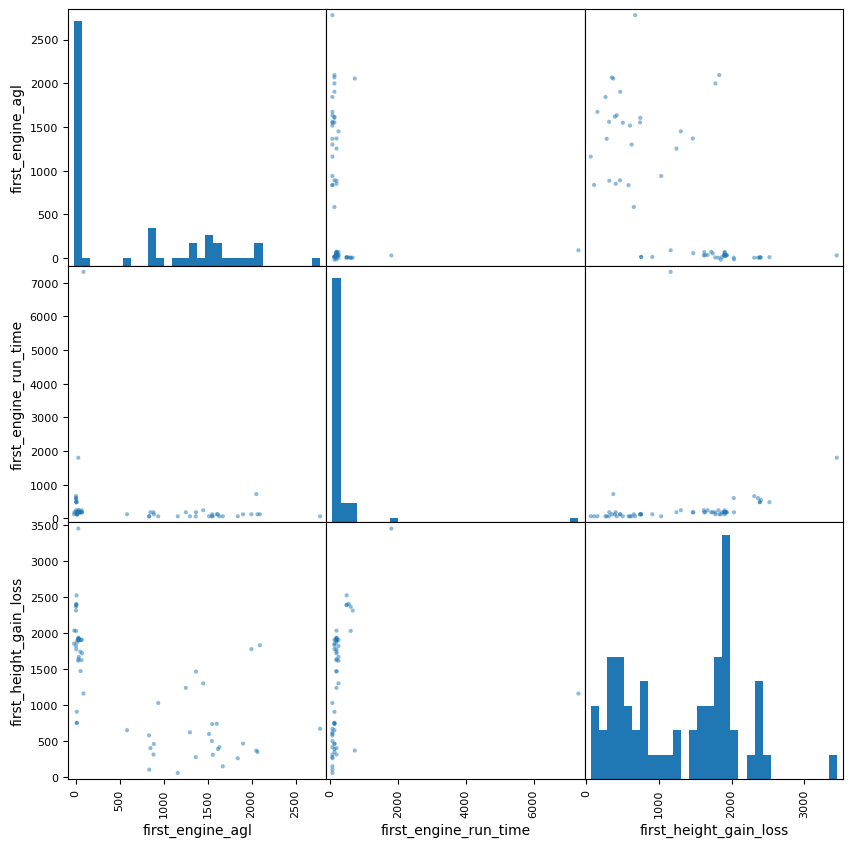

In [22]:
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix 
  
# selecting three numerical features 
features = ['first_engine_agl','first_engine_run_time','first_height_gain_loss'] 
   
# plotting the scatter matrix 
# with the features 
scatter_matrix(df_filtered[features],hist_kwds={'bins': 30},figsize=(10, 10)) 
plt.savefig('scatterplot.png')
plt.show()

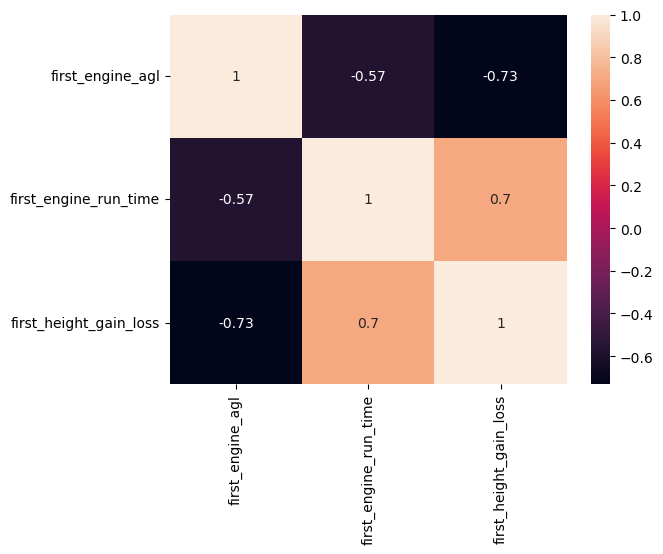

In [23]:
corr = df_new.corr(method = 'spearman')

sns.heatmap(corr, annot = True)

plt.show()

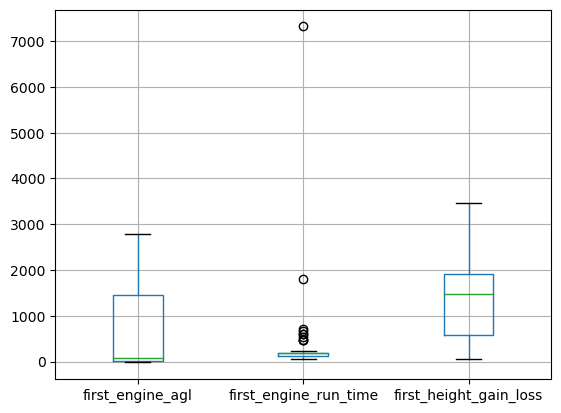

In [24]:
boxplot = df_filtered.boxplot(column=['first_engine_agl','first_engine_run_time','first_height_gain_loss'])  

In [25]:
df_new.head(12)

,first_engine_agl,first_engine_run_time,first_height_gain_loss
1,13.0,120,908
9,1617.0,120,391
31,7.0,480,2392
33,2067.0,120,351
51,1604.0,120,742
62,4.0,600,2031
73,7.0,480,2388
77,1365.0,60,279
84,30.0,1800,3451
106,10.0,480,2523


In [26]:
df_new.median()

first_engine_agl            69.0
first_engine_run_time      180.0
first_height_gain_loss    1473.0
dtype: object

In [27]:
df_new['first_engine_agl'].mean()

689.327868852459

In [28]:
df_filtered['Less_than_250s_run_time'] = df_filtered['first_engine_run_time'] < 250
df_filtered['Less_than_250s_run_time'].head(10)

1       True
9       True
31     False
33      True
51      True
62     False
73     False
77      True
84     False
106    False
Name: Less_than_250s_run_time, dtype: bool

In [29]:
df_filtered_2 = df_filtered[df_filtered['Less_than_250s_run_time'] == True]

In [30]:
len(df_filtered_2)

51

In [31]:
len(df)

408

In [32]:
df_test = df_filtered[['Gtype','first_engine_agl','first_engine_run_time','first_height_gain_loss']]

In [33]:
df_test.head(12)

,Gtype,first_engine_agl,first_engine_run_time,first_height_gain_loss
1,VENTUS 3F,13.0,120.0,908.0
9,ASW 27-18 E (ASG-29E),1617.0,120.0,391.0
31,Nimeta,7.0,480.0,2392.0
33,ASW 27-18 E (ASG-29E),2067.0,120.0,351.0
51,VENTUS CT,1604.0,120.0,742.0
62,Nimeta,4.0,600.0,2031.0
73,Nimeta,7.0,480.0,2388.0
77,DISCUS-2CT,1365.0,60.0,279.0
84,ASW 27-18 E (ASG-29E),30.0,1800.0,3451.0
106,Nimeta,10.0,480.0,2523.0


In [34]:
df_test.to_csv('Engine_runs_less_than_5_min.csv', index=False)